## Importar
Correr todas las veces


In [ ]:
!pip  install neural-map

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 38.6 MB/s 
  Created wheel for neural-map: filename=neural_map-1.0.0-py3-none-any.whl size=29259 sha256=6e4e7c106c90fd82885f179eab785b7db7ecddf4cf01e3ef308fe7c6f948d756
  Stored in directory: /root/.cache/pip/wheels/e9/de/b9/258efc94be6178b394390ff87b0788090c2293dfe80a0af252
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342081 sha256=86480db3165c5c028c8dbebce387e04f87923c025a50d4c554a0e4b7d5b60c2b
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built neural-map hdbscan


In [ ]:
from neural_map import NeuralMap, _plot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import fetch_openml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

## Carga de datos

In [ ]:
#mist_test = pd.read_csv('/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/MIST-20-test.csv')
mist_test = pd.read_csv('/content/drive/MyDrive/5to/sistemas_inteligentes/MIST-20-test.csv')


In [ ]:
#mist_train = pd.read_csv('/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/MIST-20-train.csv')
mist_train = pd.read_csv('/content/drive/MyDrive/5to/sistemas_inteligentes/MIST-20-train.csv')


In [ ]:
mist_train['pixel98'].max()

255.0

In [ ]:
# mist_train.columns = mist_train.columns.astype(str)
scaler = MinMaxScaler()

data = mist_train.drop('Unnamed: 0', axis=1)
data_col_names = data.columns
data = data.drop('digit', axis=1)

data = scaler.fit_transform(data)

¿Set unnamed as index?

# NeuralMap

## Train **NO CORRER**


In [ ]:
# instanciación de la clase NeuralMap
som = NeuralMap(variables=data.shape[1], columns=20, rows=20, toroidal=True, metric='correlation')

In [ ]:
# entranemiento de la instancia
som.train(data=data, verbose=False)

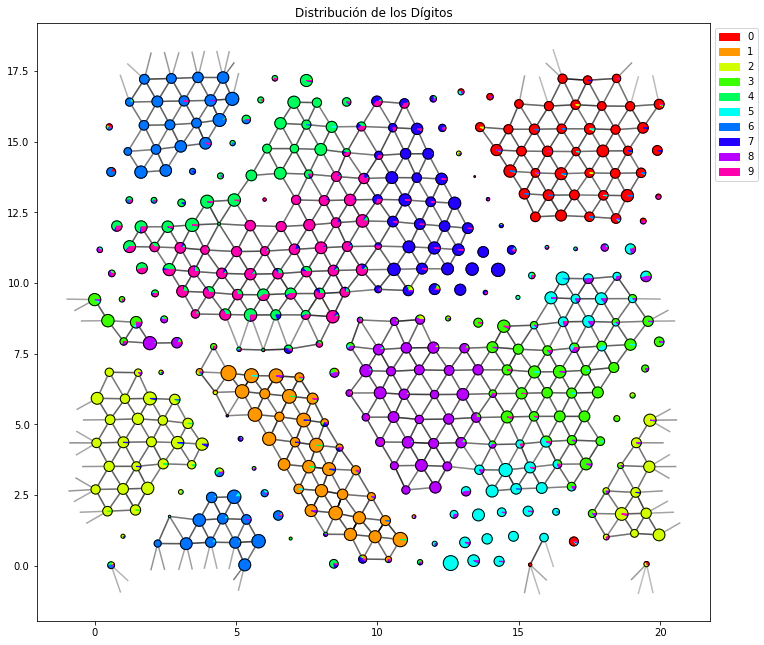

In [ ]:
som.plot_analysis(data, attached_values=mist_train['digit'].values, min_cluster_size=8, size=13, title='Distribución de los Dígitos')

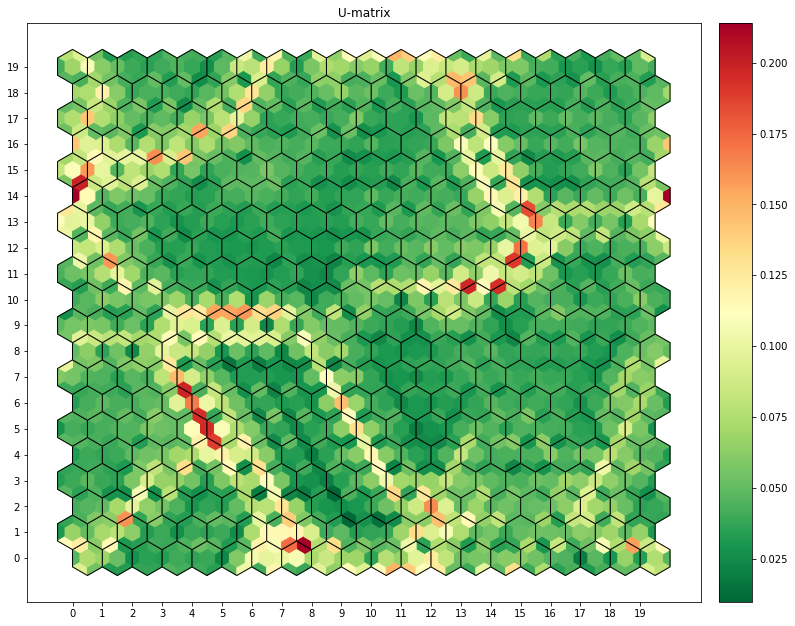

In [ ]:
som.plot_unified_distance_matrix(size=13)

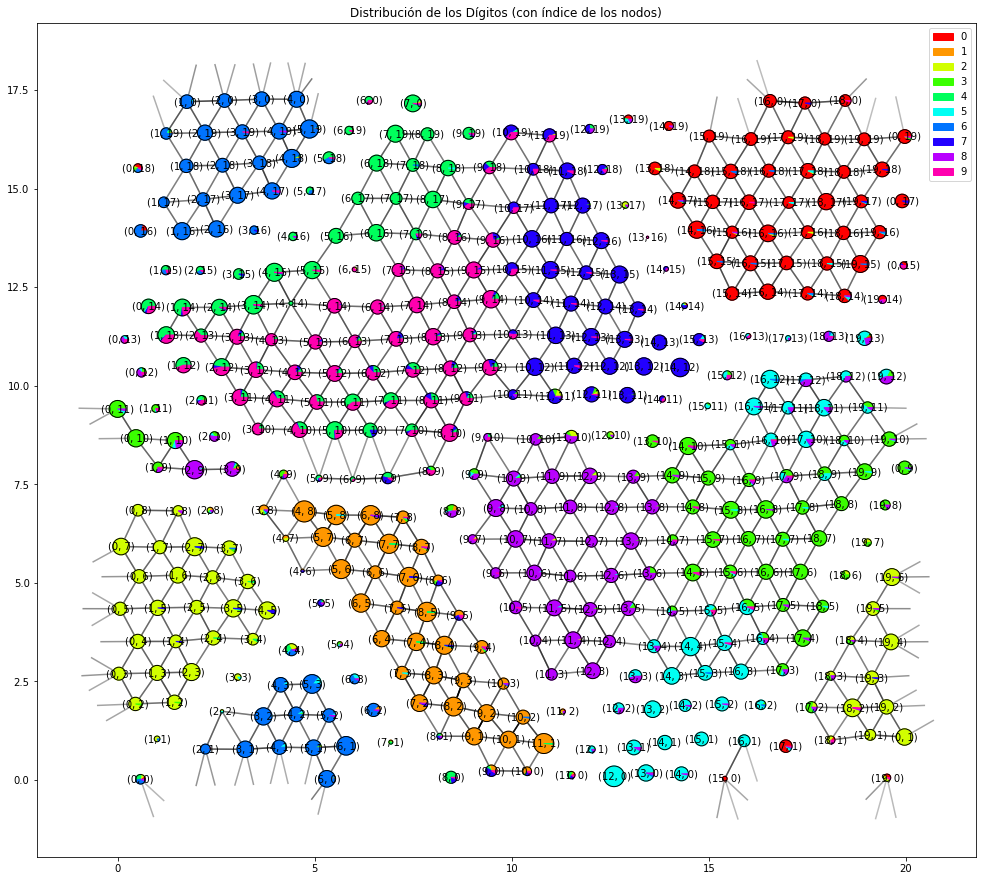

In [ ]:
som.plot_analysis(data, attached_values=mist_train['digit'].values, min_cluster_size=8, display_value='index', size=18, title='Distribución de los Dígitos (con índice de los nodos)')
plt.show()


In [ ]:
som_20_dic = som.get_dict()

### Para guardar el modelo


In [ ]:
#path = '/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/som_20_dic_drop-unnamed.pickle'
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/som_20_dic_drop-unnamed.pickle'

with open(path, "wb") as f:
  pickle.dump(som_20_dic, f)

## Cargando instancia de NeuralMap 

In [ ]:
#path = '/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/som_20_dic_drop-unnamed.pickle'
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/som_20_dic_drop-unnamed.pickle'
with open(path, 'rb') as f:
    som_20_dic = pickle.load(f)

In [ ]:
som = NeuralMap(**som_20_dic)

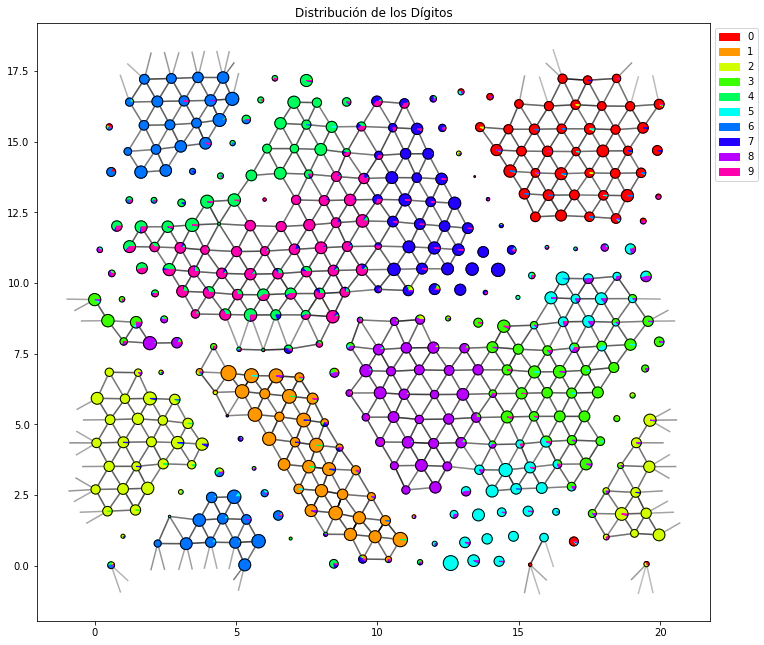

In [ ]:
som.plot_analysis(data, attached_values=mist_train['digit'].values, min_cluster_size=8, size=13, title='Distribución de los Dígitos')

In [ ]:
# map_att = som.map_attachments(data, attachments=mist_train['digit'].values)

In [ ]:
def get_nodes_of(self, data, attachments):
  output = pd.DataFrame(columns = ['node'])
  for ind, attachment in zip(data, attachments):
    output.loc[attachment] = [tuple(self.get_best_matching_unit(ind))]
  return output

In [ ]:
nodes = get_nodes_of(som, data, attachments = mist_train.index)

In [ ]:
#data_c = data.copy()
#data_c = pd.DataFrame(data_c, columns = data_col_names)
mist_train['node'] = nodes['node']
#data_c

Dejamos minst_train sin Unamed y digit
Dejamos minst_test sin Unamed y digit

# mist_validation

In [ ]:
# para train usamos mist_train
# para train usamos mist_test
mist_test_g = mist_test.drop(['Unnamed: 0'], axis=1)
len(mist_test_g)
mist_test_g

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
55995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
55996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
55997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
mist_test_g.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'digit'],
      dtype='object', length=785)

In [ ]:
count = mist_test_g.groupby(['digit']).size()
percentage = count / len(mist_test_g)
print(count, percentage)

digit
0    5522
1    6302
2    5592
3    5713
4    5459
5    5050
6    5501
7    5834
8    5460
9    5566
dtype: int64 digit
0    0.098609
1    0.112538
2    0.099859
3    0.102020
4    0.097484
5    0.090180
6    0.098234
7    0.104180
8    0.097502
9    0.099395
dtype: float64


In [ ]:
test_shape=  mist_test_g.shape[0] 
train_sape =  mist_train.shape[0]

shape_f = train_sape * 100 / test_shape
print(test_shape)
print(train_sape)
shape_f= shape_f /100
print(shape_f)

55999
14001
0.2500223218271755


In [ ]:
i = 0
validation = pd.DataFrame(columns= data_col_names)
print(validation)

while i <= 9:
  this_i = mist_test_g[mist_test_g['digit'] == i].sample(frac=shape_f)
  validation = pd.concat([validation, this_i])
  i = i+1

len(validation)

Empty DataFrame
Columns: [pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, pixel100, ...]
Index: []

[0 rows x 784 columns]


14002

In [ ]:
validation['digit'] = validation['digit'].astype(int)
validation

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
38549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
41208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
47449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
26986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
39647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
45256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [ ]:
count = validation.groupby(['digit']).size()
percentage = count / len(validation)
print(count, percentage)

digit
0    1381
1    1576
2    1398
3    1428
4    1365
5    1263
6    1375
7    1459
8    1365
9    1392
dtype: int64 digit
0    0.098629
1    0.112555
2    0.099843
3    0.101985
4    0.097486
5    0.090201
6    0.098200
7    0.104199
8    0.097486
9    0.099414
dtype: float64


In [ ]:
test = pd.merge(mist_test_g, validation, how="outer", indicator=True
              ).query('_merge=="left_only"')
test = test.drop('_merge', axis=1)
test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
55994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
55995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
55996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/MIST-20-validation.csv'
#path = '/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/MIST-20-train.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  validation.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/MIST-20-test_2.csv'
#path = '/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/MIST-20-train.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  test.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clasificacion

In [ ]:
mist_train_g = mist_train.drop(['Unnamed: 0'], axis=1)
train_col_names = mist_train_g.columns

In [ ]:
def shape(conjunto_superior, cut):
  train_shape =  conjunto_superior.shape[0]
  conjuntos_shape = conjunto_superior.shape[0] /cut

  shape_f = conjuntos_shape * 100 / train_shape
  shape_f= shape_f /100
  return shape_f

In [ ]:
def conjunto(mist_train_g):
  count = mist_train_g.groupby('node')['node']
  m_train = pd.DataFrame(columns= train_col_names)
  print(m_train)
  x=0
  y=0
  sop= (0, 0)
  sopf= (19, 19)

  while sop <= sopf:
    if(y > 19):
      y=0
      x+=1
      sopL = list(sop)
      sopL[1] = y
      sopL[0] = x
      sop = tuple(sopL)
    
    if len(mist_train_g[mist_train_g['node'] == sop])!=0:
      if count.get_group(sop).count() == 1:
        this_i = mist_train_g[mist_train_g['node'] == sop].sample(frac=1)
      else:
        this_i = mist_train_g[mist_train_g['node'] == sop].sample(frac=shape(mist_train_g, 3))
    else:
      print('no encontro')
    
    #print(sop)
    sopL = list(sop)
    y+=1
    sopL[1] = y
    sop = tuple(sopL)

    m_train = pd.concat([m_train, this_i])
    
  len(m_train)
  return m_train

In [ ]:
m_train= conjunto(mist_train_g)
m_train

Empty DataFrame
Columns: [pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, pixel100, ...]
Index: []

[0 rows x 786 columns]


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit,node
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(0, 0)"
9150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"(0, 0)"
11842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,"(0, 0)"
5888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"(0, 0)"
8523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
1303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
1118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"


In [ ]:
m_test= conjunto(mist_train_g)
m_test

Empty DataFrame
Columns: [pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, pixel100, ...]
Index: []

[0 rows x 786 columns]


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit,node
6852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"(0, 0)"
9150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"(0, 0)"
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(0, 0)"
3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,"(0, 0)"
11842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"


In [ ]:
m_validation= conjunto(mist_train_g)
m_validation

Empty DataFrame
Columns: [pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, pixel100, ...]
Index: []

[0 rows x 786 columns]


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit,node
6836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"(0, 0)"
8696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"(0, 0)"
4162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,"(0, 0)"
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(0, 0)"
6351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
1303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"
1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"(19, 19)"


In [ ]:
m_train = m_train.drop(['digit'], axis=1)
m_validation = m_validation.drop(['digit'], axis=1)
m_test = m_test.drop(['digit'], axis=1)

In [ ]:
%tensorflow_version 2.3

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.3`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from time import time

import tensorflow as tf
from scipy.stats import randint as sp_randint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
y_validation = pd.get_dummies(m_validation["node"], columns=["node"], prefix='node')# merge with main df bridge_df on key values
y_validation_cols= y_validation.columns
y_validation = y_validation[y_validation_cols].to_numpy()
y_validation.shape

(4673, 400)

In [ ]:
y_train = pd.get_dummies(m_train["node"], columns=["node"], prefix='node')# merge with main df bridge_df on key values
y_train_cols= y_train.columns

num_classes= y_train[y_train_cols].to_numpy().shape[1]
y_train=y_train[y_train_cols].to_numpy()
y_train.shape

(4673, 400)

In [ ]:
y_test = pd.get_dummies(m_test["node"], columns=["node"])# merge with main df bridge_df on key values
y_test_cols= y_test.columns

y_test=y_test[y_test_cols].to_numpy()
y_test.shape
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
#train
x_train = m_train.drop(["node"], axis=1).astype("float32").to_numpy()
#validation
x_validation = m_validation.drop(["node"], axis=1).astype("float32").to_numpy()
#test
x_test = m_test.drop(["node"], axis=1).astype("float32").to_numpy()

In [ ]:
scaler = MinMaxScaler()  #StandardScaler()

x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)

In [ ]:
input_shape = x_train[0].shape    #(dimensiones 785)
print(input_shape)

# Construimos nuestro modelo
model = keras.Sequential([

    keras.Input(shape=input_shape),
    keras.layers.Dense(100, activation='tanh'),
    layers.Dropout(0.1),
    keras.layers.Dense(34, activation='elu'),
    layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax'),

])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print('Summary:')
model.summary()

print("\nTraining...")
print("\nTraining...")
history = model.fit(
    x=x_train, 
    y=y_train, 
    validation_data=(x_validation, y_validation), 
    epochs=500, 
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=40)],
)

(784,)
Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 34)                3434      
                                                                 
 dropout_1 (Dropout)         (None, 34)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2240      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 400)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(4673, 784)
(4673, 400)


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

147/147 [==============================] - 0s 2ms/step - loss: 1.1629 - accuracy: 0.7079
Test accuracy: 0.7078964114189148


In [ ]:
pred = model.predict(x_test)

In [ ]:
arr=[]
arrGrande=[]

for i_dato in pred:
  for x in i_dato:
    if round(x)<=0:
      arr.append(0)
    else:
      arr.append(1)
  arrGrande.append(arr)
  arr=[]

In [ ]:
arr = np.array(arrGrande)

In [ ]:
y_test[79]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
arr[79]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
t= pd.DataFrame(y_test, columns=y_test_cols)
s2 = t.idxmax(axis=1)
s2

0         (0, 0)
1         (0, 0)
2         (0, 0)
3         (0, 0)
4         (0, 0)
          ...   
4668    (19, 19)
4669    (19, 19)
4670    (19, 19)
4671    (19, 19)
4672    (19, 19)
Length: 4673, dtype: object

In [ ]:
a= pd.DataFrame(arr, columns=y_test_cols)
s1 = a.idxmax(axis=1)
s1

0         (0, 0)
1         (0, 0)
2         (0, 0)
3        (0, 19)
4         (0, 0)
          ...   
4668      (0, 0)
4669    (19, 19)
4670    (19, 19)
4671      (0, 0)
4672    (19, 18)
Length: 4673, dtype: object

In [ ]:
#path = '/content/drive/MyDrive/1erS-Quinto/sistemas_inteligentes/trabajo_final/som_20_dic_drop-unnamed.pickle'
path = '/content/drive/MyDrive/5to/sistemas_inteligentes/model_classification_71.pickle'

with open(path, "wb") as f:
  pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://129a431f-9d0b-458f-a542-4bfca5d96df9/assets


In [ ]:
def fit_model(model):
    my_callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath='/tmp/checkpoint',
        monitor="val_accuracy",
        verbose=0,
        save_best_only=True,
        save_weights_only=True,
        mode="auto",
        save_freq="epoch",
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        mode="auto",
        restore_best_weights=True,
    )
    ]
    history = model.fit(
        x=x_train, 
        y=y_train, 
        validation_data=(x_validation, y_validation), 
        epochs=200,
        batch_size=10,
        callbacks=my_callbacks,
        verbose=0
    )
    prediction = model.predict(x_validation)
    return prediction 


def compile_model(lis,act):
    input_shape = x_train[0].shape  

    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Dense(lis[0], activation=act),
            layers.Dropout(0.2),
            layers.Dense(lis[1], activation=act),
            layers.Dropout(0.2),
            layers.Dense(num_classes, activation="softmax")
        ]
    )
    opt = tf.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model